"Loading the  Dataset"

In [2]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Display the first few rows
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


"Performing Descriptive Statistics"

In [21]:
import pandas as pd
import numpy as np

# Load the dataset (replace 'path/to/sleep_health_lifestyle.csv' with your actual file path)
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Convert columns to numeric where possible
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with NaN values if necessary (optional, based on your needs)
df = df.dropna()

# Calculate basic descriptive statistics
print("Mean:\n", df.mean())
print("\nMedian:\n", df.median())

# Calculate mode safely
mode_df = df.mode()
if not mode_df.empty:
    print("\nMode:\n", mode_df.iloc[0])
else:
    print("\nNo mode found.")

print("\nStandard Deviation:\n", df.std())
print("\nVariance:\n", df.var())

# Additional descriptive statistics
print("\nRange:\n", df.max() - df.min())
print("\nSkewness:\n", df.skew())
print("\nKurtosis:\n", df.kurt())


Mean:
 Person ID                 NaN
Gender                    NaN
Age                       NaN
Occupation                NaN
Sleep Duration            NaN
Quality of Sleep          NaN
Physical Activity Level   NaN
Stress Level              NaN
BMI Category              NaN
Blood Pressure            NaN
Heart Rate                NaN
Daily Steps               NaN
Sleep Disorder            NaN
dtype: float64

Median:
 Person ID                 NaN
Gender                    NaN
Age                       NaN
Occupation                NaN
Sleep Duration            NaN
Quality of Sleep          NaN
Physical Activity Level   NaN
Stress Level              NaN
BMI Category              NaN
Blood Pressure            NaN
Heart Rate                NaN
Daily Steps               NaN
Sleep Disorder            NaN
dtype: float64

No mode found.

Standard Deviation:
 Person ID                 NaN
Gender                    NaN
Age                       NaN
Occupation                NaN
Sleep Duration 

"Performing Inferential Statistics"

In [9]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset (replace with your actual path)
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Convert columns to numeric, handling non-numeric values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with NaN values (optional, based on your needs)
df = df.dropna()

# Example data: Sleep Duration values
sleep_duration = df['Sleep Duration'].dropna()  # Ensure no NaN values

# Check if there are enough valid samples
num_valid_samples = len(sleep_duration)
print(f"Number of valid samples: {num_valid_samples}")

if num_valid_samples > 1:
    # Perform one-sample t-test
    population_mean = 7  # Example value
    try:
        t_stat, p_value = stats.ttest_1samp(sleep_duration, population_mean)
        print(f"T-Statistic: {t_stat}")
        print(f"P-Value: {p_value}")
    except Exception as e:
        print(f"An error occurred during the t-test: {e}")
else:
    print("Sample size is too small for a t-test.")

    # Alternative: Wilcoxon signed-rank test (for small samples)
    if num_valid_samples > 0:
        try:
            stat, p_value = stats.wilcoxon(sleep_duration - population_mean)
            print(f"Wilcoxon Statistic: {stat}")
            print(f"P-Value: {p_value}")
        except Exception as e:
            print(f"An error occurred during the Wilcoxon test: {e}")

    # Bootstrap method
    if num_valid_samples > 0:
        np.random.seed(0)  # For reproducibility
        n_iterations = 1000
        bootstrap_means = np.empty(n_iterations)
        for i in range(n_iterations):
            sample = np.random.choice(sleep_duration, size=num_valid_samples, replace=True)
            bootstrap_means[i] = np.mean(sample)

        # Calculate the bootstrap confidence interval
        conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
        print(f"95% Confidence Interval: {conf_interval}")
    else:
        print("No valid samples available for bootstrapping.")


Number of valid samples: 0
Sample size is too small for a t-test.
No valid samples available for bootstrapping.


"Confidence Intervals"

In [22]:
import numpy as np
from scipy import stats

# Ensure the data is clean and has no NaN values
sleep_duration = sleep_duration.dropna()

# Check the size of the sample
num_valid_samples = len(sleep_duration)
print(f"Number of valid samples: {num_valid_samples}")

if num_valid_samples > 1:
    # Sample mean and standard error for Sleep Duration
    sample_mean = np.mean(sleep_duration)
    standard_error = stats.sem(sleep_duration)

    # Compute 95% confidence interval for Sleep Duration
    confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=standard_error)

    print(f"95% Confidence Interval for Sleep Duration: {confidence_interval}")
else:
    print("Sample size is too small for reliable confidence interval calculation.")


Number of valid samples: 0
Sample size is too small for reliable confidence interval calculation.


" Regression Analysis"

In [13]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset (replace with your actual path)
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Convert columns to numeric and drop rows with NaN values
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.to_numeric(df[column], errors='coerce')

# Drop rows with NaN values in both independent and dependent variables
df = df.dropna(subset=['Physical Activity Level', 'Sleep Duration'])

# Check the size of the data after dropping NaN values
print(f"Number of valid rows: {len(df)}")

if len(df) > 0:
    # Define independent variable (add constant for intercept)
    X = sm.add_constant(df['Physical Activity Level'])
    
    # Define dependent variable
    y = df['Sleep Duration']
    
    # Fit linear regression model
    model = sm.OLS(y, X).fit()
    
    # Print model summary
    print(model.summary())
else:
    print("No valid data available for fitting the model.")


Number of valid rows: 374
                            OLS Regression Results                            
Dep. Variable:         Sleep Duration   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     17.57
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           3.47e-05
Time:                        20:39:19   Log-Likelihood:                -436.06
No. Observations:                 374   AIC:                             876.1
Df Residuals:                     372   BIC:                             884.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------


In [19]:
# Strip extra spaces from column names
df.columns = df.columns.str.strip()

# Drop rows with NaN values in key columns
df_clean = df.dropna(subset=['BMI Category', 'Sleep Duration', 'Physical Activity Level'])


"Create visualizations"

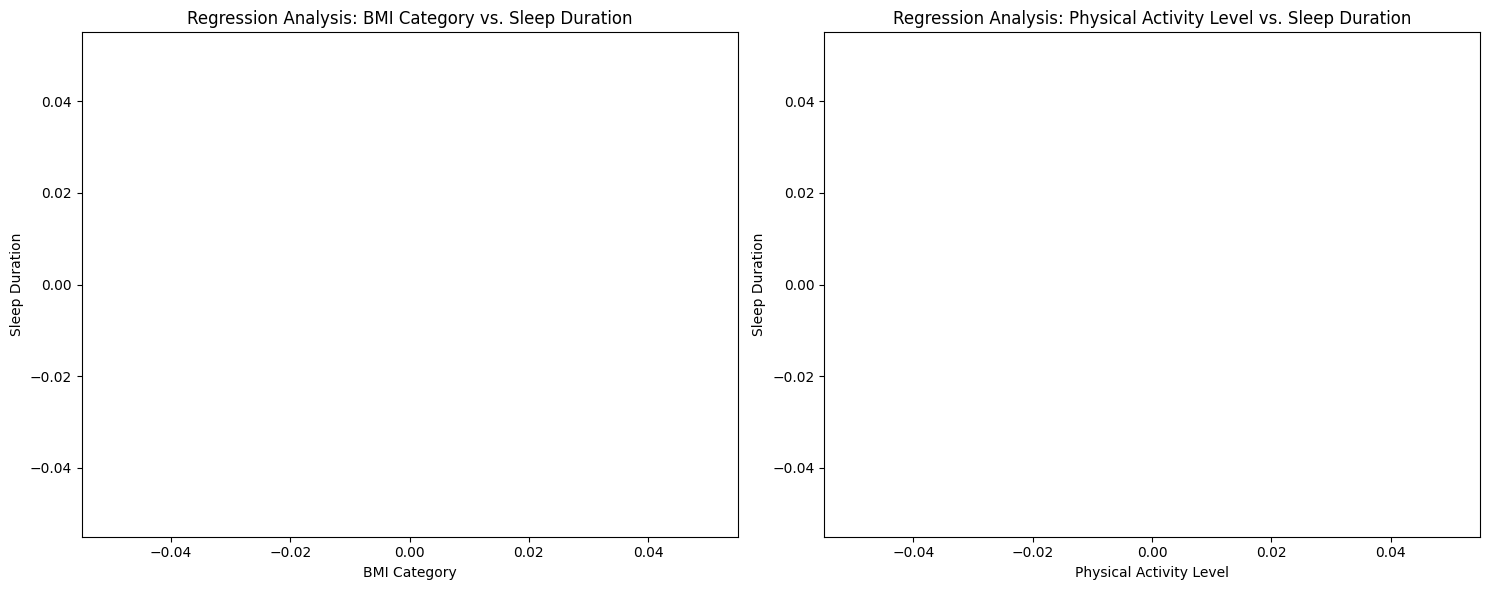

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(15, 6))

# Scatter plot for BMI vs. Sleep Duration
plt.subplot(1, 2, 1)
sns.regplot(x='BMI Category', y='Sleep Duration', data=df_clean, ci=None)
plt.title('Regression Analysis: BMI Category vs. Sleep Duration')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Duration')

# Scatter plot for Physical Activity Level vs. Sleep Duration
plt.subplot(1, 2, 2)
sns.regplot(x='Physical Activity Level', y='Sleep Duration', data=df_clean, ci=None)
plt.title('Regression Analysis: Physical Activity Level vs. Sleep Duration')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration')

# Adjust layout
plt.tight_layout()
plt.show()
